In [1]:
import Utilities.prelude
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import k3match
from tqdm import tqdm
import pickle 
import math 

from src.shock_zone import find_prepost#,shock_direction
from Utilities.operators import make_tree#, calc_grad

# %matplotlib widget # (to go back normal %matplotlib inline)
# mpl.rcParams['figure.dpi'] = 100

In [2]:
z_chosen = 0
mach_min = 1.3
gamma = 5/3
save = False
folder = 'sedov'
snap = '100'
m = 5
path = f'{folder}/{snap}'

is_tde = False
epsilon = 0.02
cross_section = False

In [3]:
sim_tree, X, Y, Z, Vol, VX, VY, VZ, Den, Press, Temp = make_tree(path, snap, is_tde)
dim_cell = (3*Vol/(4*np.pi))**(1/3)

all T=0, bro. Compute by myself!


In [18]:
data = np.loadtxt(f'data/{snap}/shocksurface_{snap}.txt')
indeces = data[0]
indeces = np.array([int(i) for i in indeces])

surface_Tmach = data[1]
surface_Pmach = data[2]
surface_Denmach = data[3]
indeces_pre = data[4]
indeces_pre = np.array([int(i) for i in indeces_pre])
indeces_post = data[5]
indeces_post = np.array([int(i) for i in indeces_post])
    

In [19]:
# Import data
with open(f'data/{snap}/areushock_{snap}.pkl', 'rb') as filebool:
    are_u_shock = pickle.load(filebool)
    
shockzone = np.loadtxt(f'data/{snap}/shockzone_{snap}.txt')

idx_tree = shockzone[0]
div = shockzone[1]
x_dir = shockzone[2]
y_dir = shockzone[3]
z_dir = shockzone[4]

idx_tree = np.array([int(i) for i in idx_tree])
x_zone = X[idx_tree]
y_zone = Y[idx_tree]
z_zone = Z[idx_tree]
Tzone = Temp[idx_tree]
dim_cell_zone = dim_cell[idx_tree]

dir = []
for i in range(len(x_dir)):
    dir.append([x_dir[i], y_dir[i], z_dir[i]])

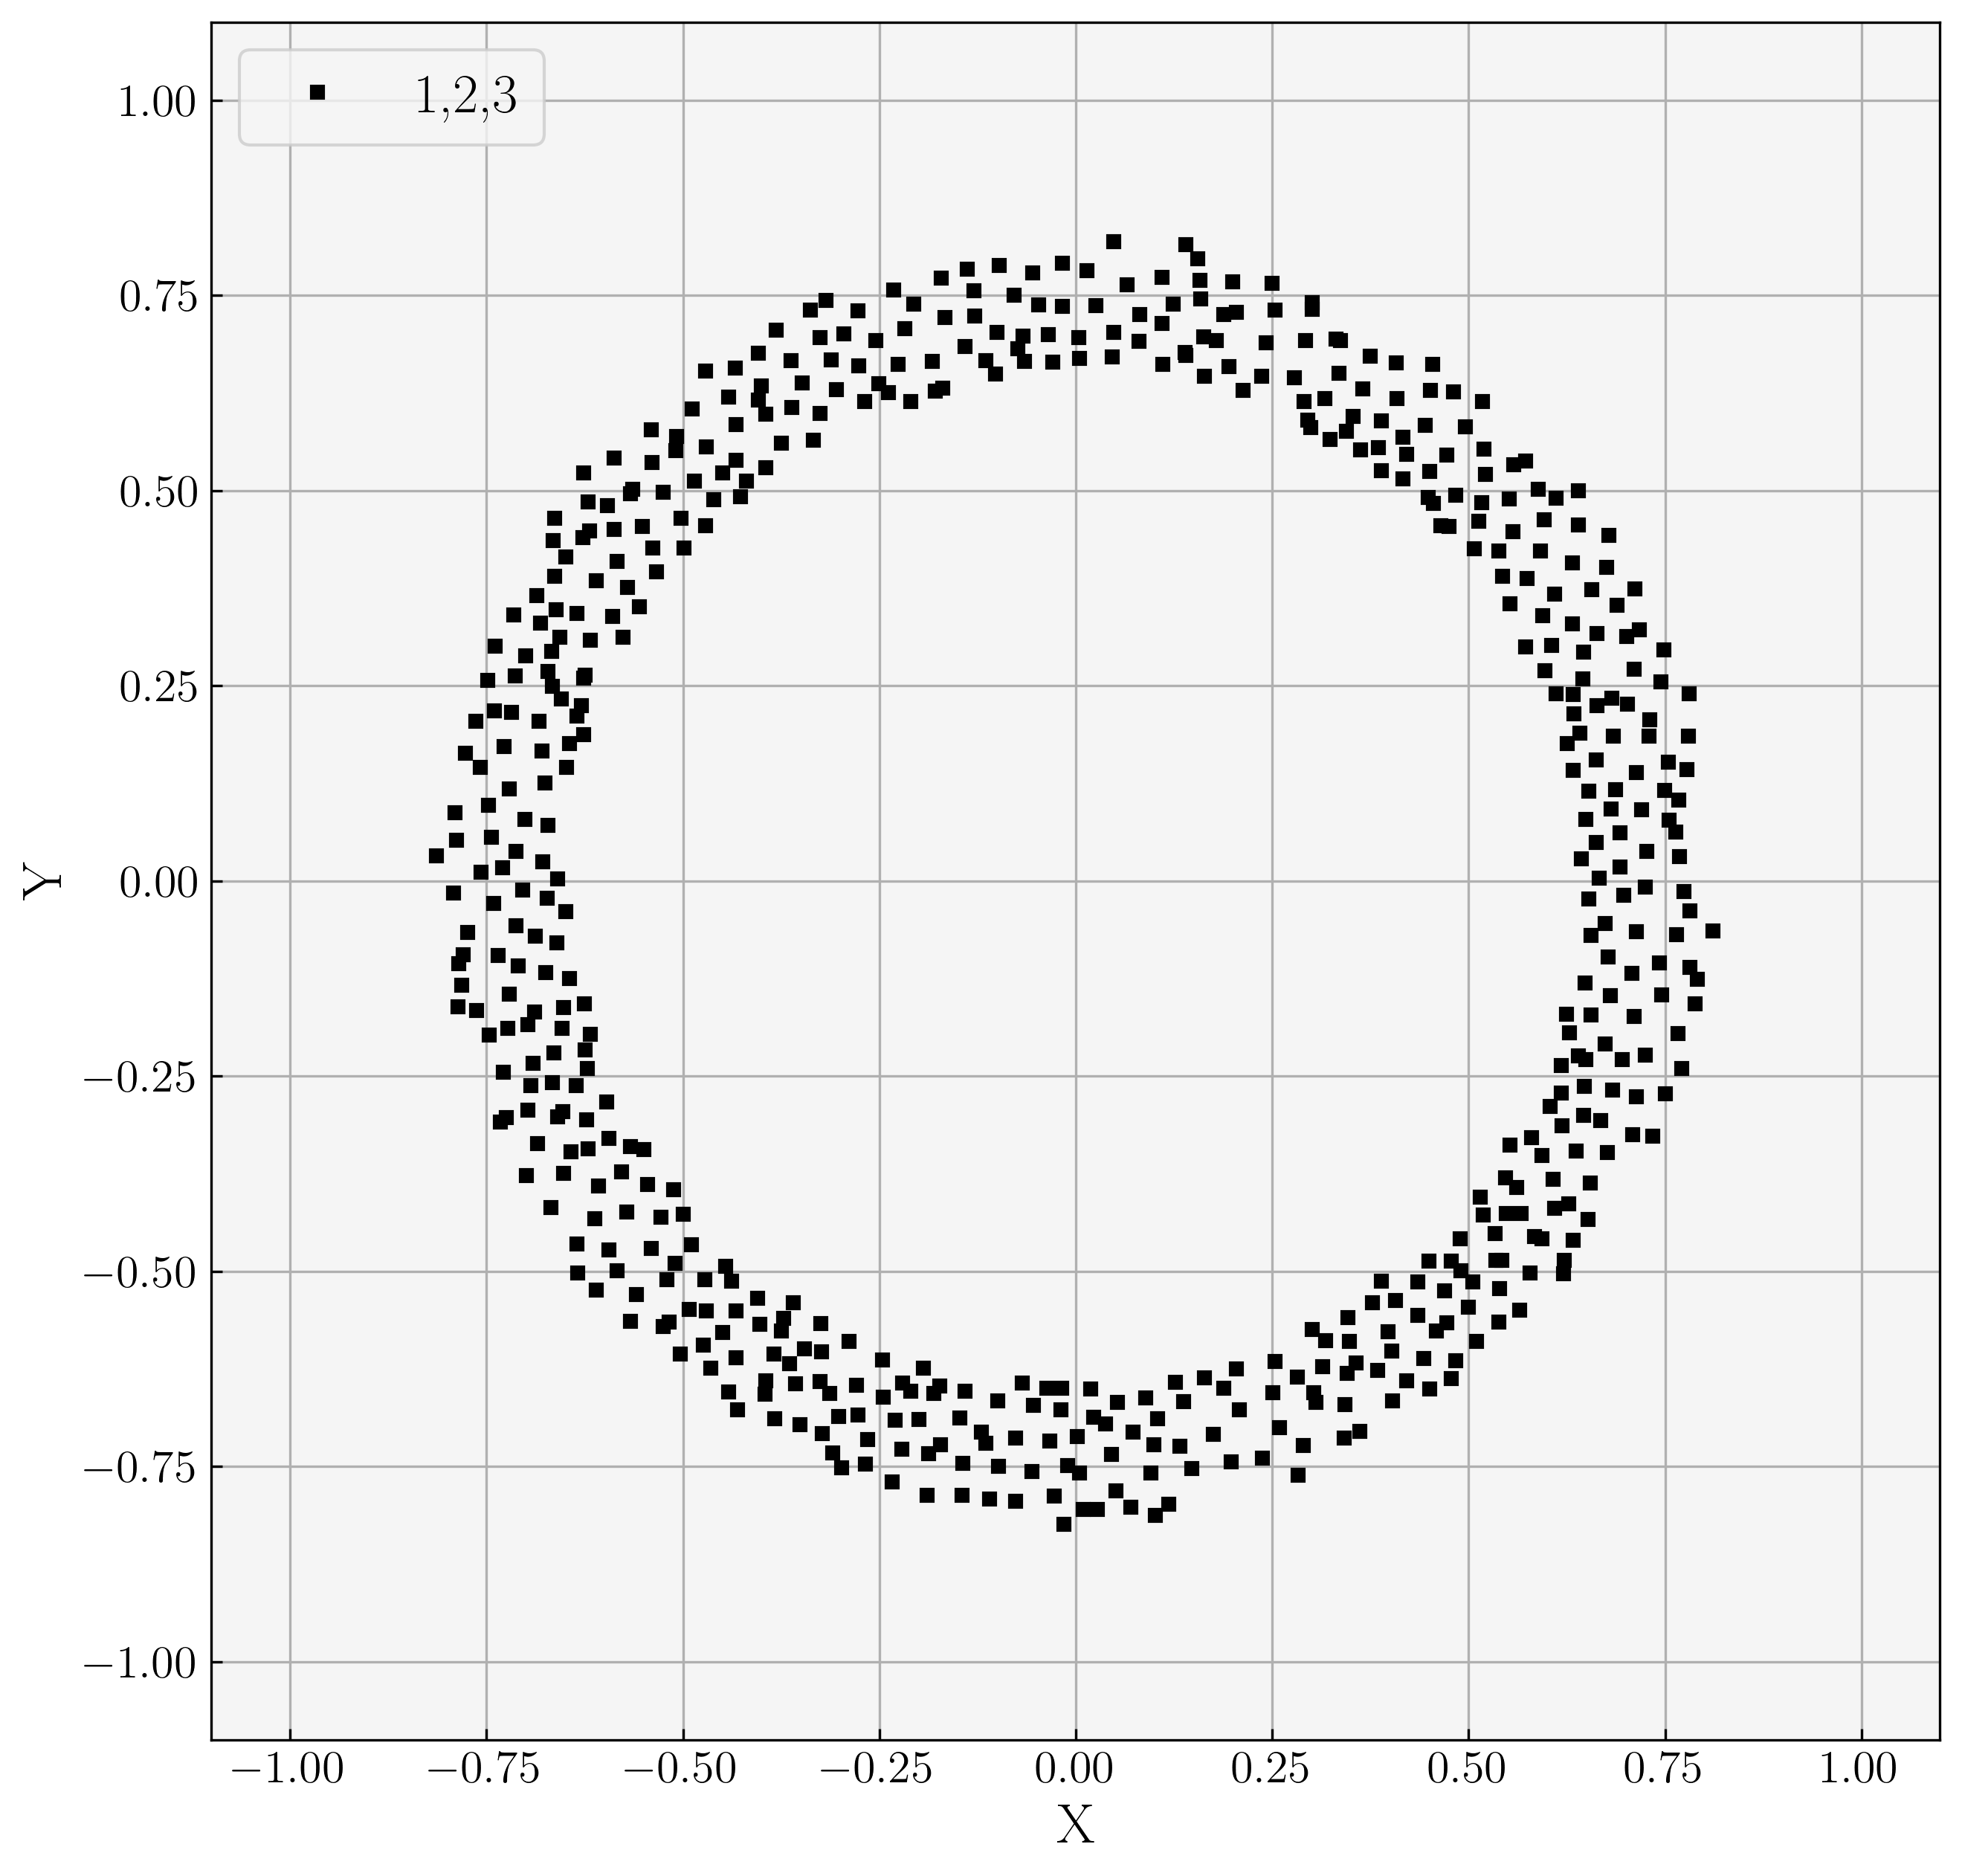

In [28]:
plt.figure(figsize=(10,10))
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)

plt.plot(x_zone[np.abs(z_zone)<dim_cell_zone], y_zone[np.abs(z_zone)<dim_cell_zone], 'ks', markerfacecolor='k', ms=4, markeredgecolor='k', label = '1,2,3')
plt.xlabel('X', fontsize = 18)
plt.ylabel('Y', fontsize = 18)

plt.legend(loc = 'upper left', fontsize = 18)
plt.grid()
if save:    
    plt.savefig(f'Figs/{snap}/3XYshockzone_conditions_{snap}zoom.png')
plt.show()

In [20]:
#if folder == 'sedov':    
surface_x = x_zone[indeces]
surface_y = y_zone[indeces]
surface_z = z_zone[indeces]
surface_dirx = x_dir[indeces]
surface_diry = y_dir[indeces]
epsilon_surf = dim_cell_zone[indeces]

post_x = X[indeces_post]
post_y = Y[indeces_post]
post_z = Z[indeces_post]
pre_x = X[indeces_pre]
pre_y = Y[indeces_pre]
pre_z = Z[indeces_post]

epsilon_post = dim_cell[indeces_post]
epsilon_pre = dim_cell[indeces_pre]
    


In [41]:
# Cross section
if folder == 'sedov':
    zone_cross_x = x_zone[np.abs(z_zone-z_chosen)< dim_cell_zone]
    zone_cross_y = y_zone[np.abs(z_zone-z_chosen)< dim_cell_zone]

    surface_cross_x = surface_x[np.abs(surface_z-z_chosen)< epsilon_surf]
    surface_cross_y = surface_y[np.abs(surface_z-z_chosen)< epsilon_surf]

    cross_shockdirx = surface_dirx[np.abs(surface_z-z_chosen)< epsilon_surf]
    cross_shockdiry = surface_diry[np.abs(surface_z-z_chosen)< epsilon_surf]

    zone_post_x = post_x[np.logical_and(np.abs(surface_z-z_chosen)<epsilon_surf, np.abs(post_z-z_chosen)<epsilon_post)] # post_x[np.abs(surface_z-z_chosen)<epsilon_surf] 
    zone_post_y = post_y[np.logical_and(np.abs(surface_z-z_chosen)<epsilon_surf, np.abs(post_z-z_chosen)<epsilon_post)] # post_y[np.abs(surface_z-z_chosen)<epsilon_surf]

    zone_pre_x = pre_x[np.logical_and(np.abs(surface_z-z_chosen)<epsilon_surf, np.abs(pre_z-z_chosen)<epsilon_pre)] # pre_x[np.abs(surface_z-z_chosen)<epsilon_surf]
    zone_pre_y = pre_y[np.logical_and(np.abs(surface_z-z_chosen)<epsilon_surf, np.abs(pre_z-z_chosen)<epsilon_pre)] # pre_y[np.abs(surface_z-z_chosen)<epsilon_surf]


Compare with old data

In [45]:
save = True

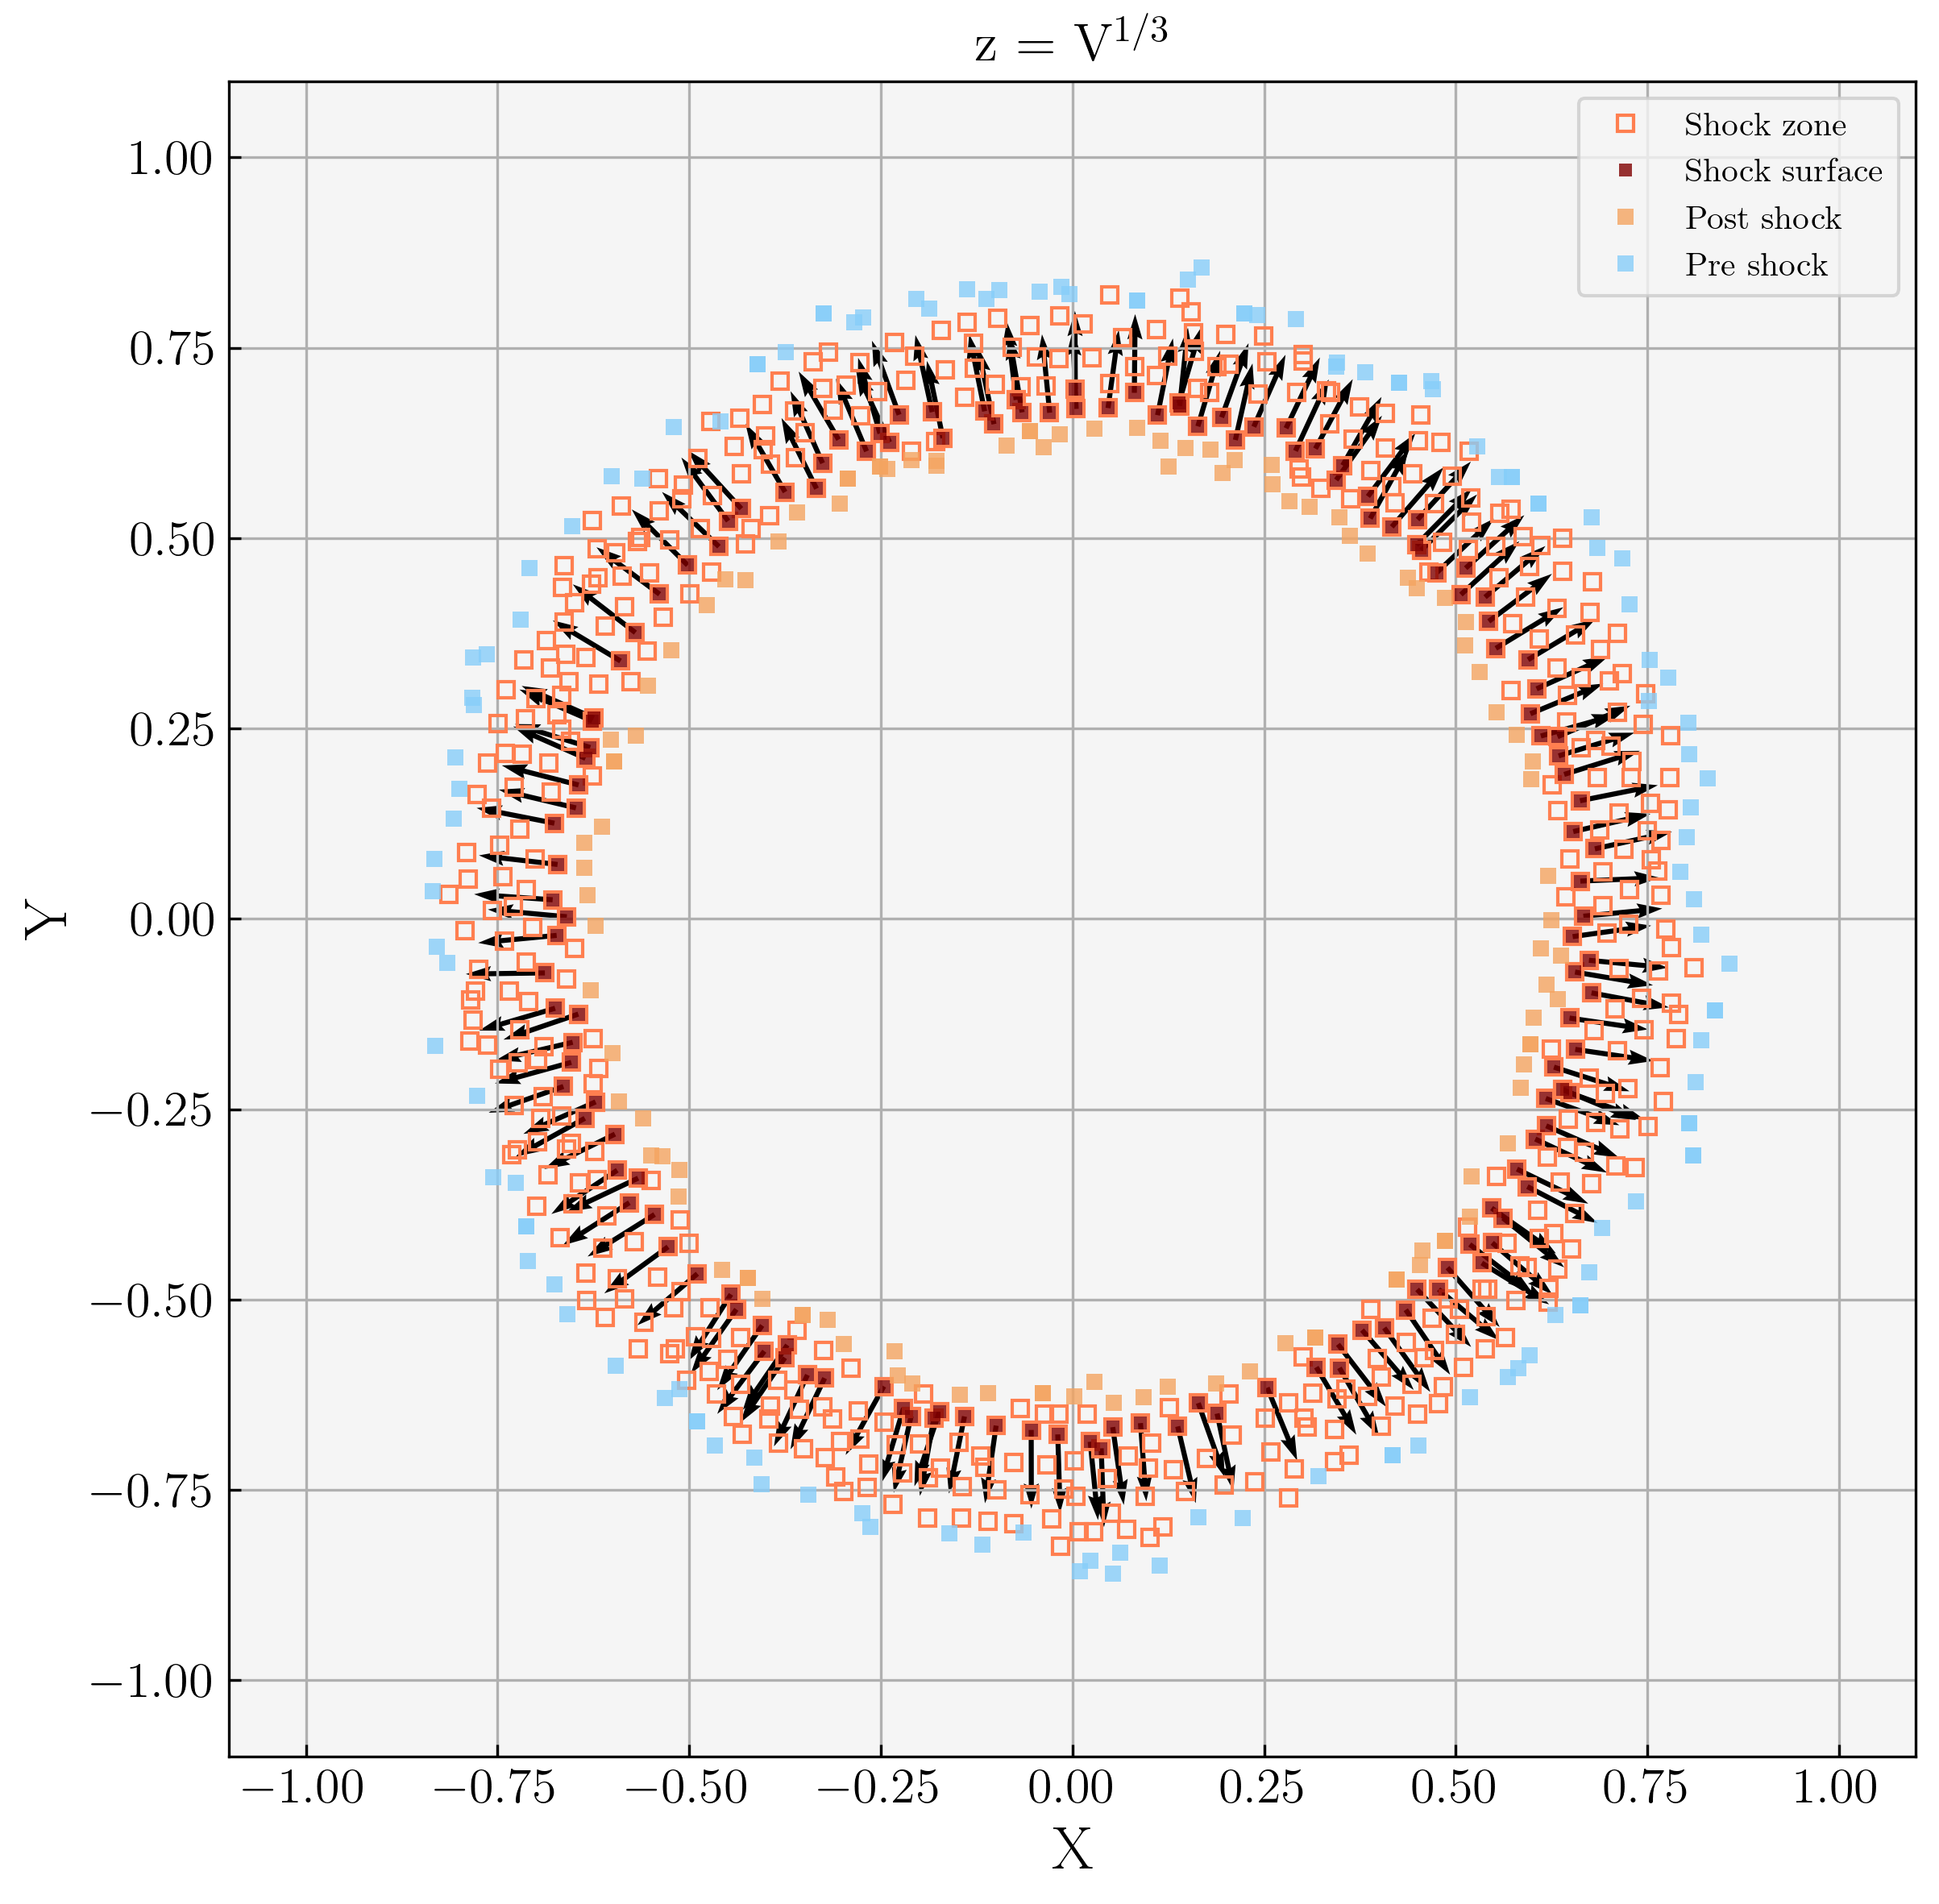

In [50]:
# Maybe for every cell of the shock surface you don't see pre/post because they are not on the same layers
if folder == 'sedov':
    fig, ax = plt.subplots(1,1, figsize = (9,9))
    ax.plot(zone_cross_x, zone_cross_y, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='coral', label = 'Shock zone')
    ax.plot(surface_cross_x, surface_cross_y, 'ks', markerfacecolor='maroon', ms = 4, markeredgecolor='none',  alpha = 0.8, label = 'Shock surface')

    ax.plot(zone_post_x, zone_post_y, 'ks', markerfacecolor='sandybrown', ms = 5, markeredgecolor='none', alpha = 0.8,  label = 'Post shock')
    ax.plot(zone_pre_x, zone_pre_y, 'ks', markerfacecolor='lightskyblue', ms = 5, markeredgecolor='none', alpha = 0.8,  label = 'Pre shock')
    ax.quiver(surface_cross_x, surface_cross_y, cross_shockdirx, cross_shockdiry, color = 'k', angles='xy', scale_units='xy', width = 3e-3)#, scale = 20)

    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    ax.set_xlabel('X', fontsize = 18)
    ax.set_ylabel('Y', fontsize = 18)
    ax.legend()
    ax.set_title(r'z = V$^{1/3}$', fontsize = 16)
    plt.grid()
    if save == True:
        plt.savefig(f'Figs/{snap}/5shocksurface_thirdV_{snap}.png')


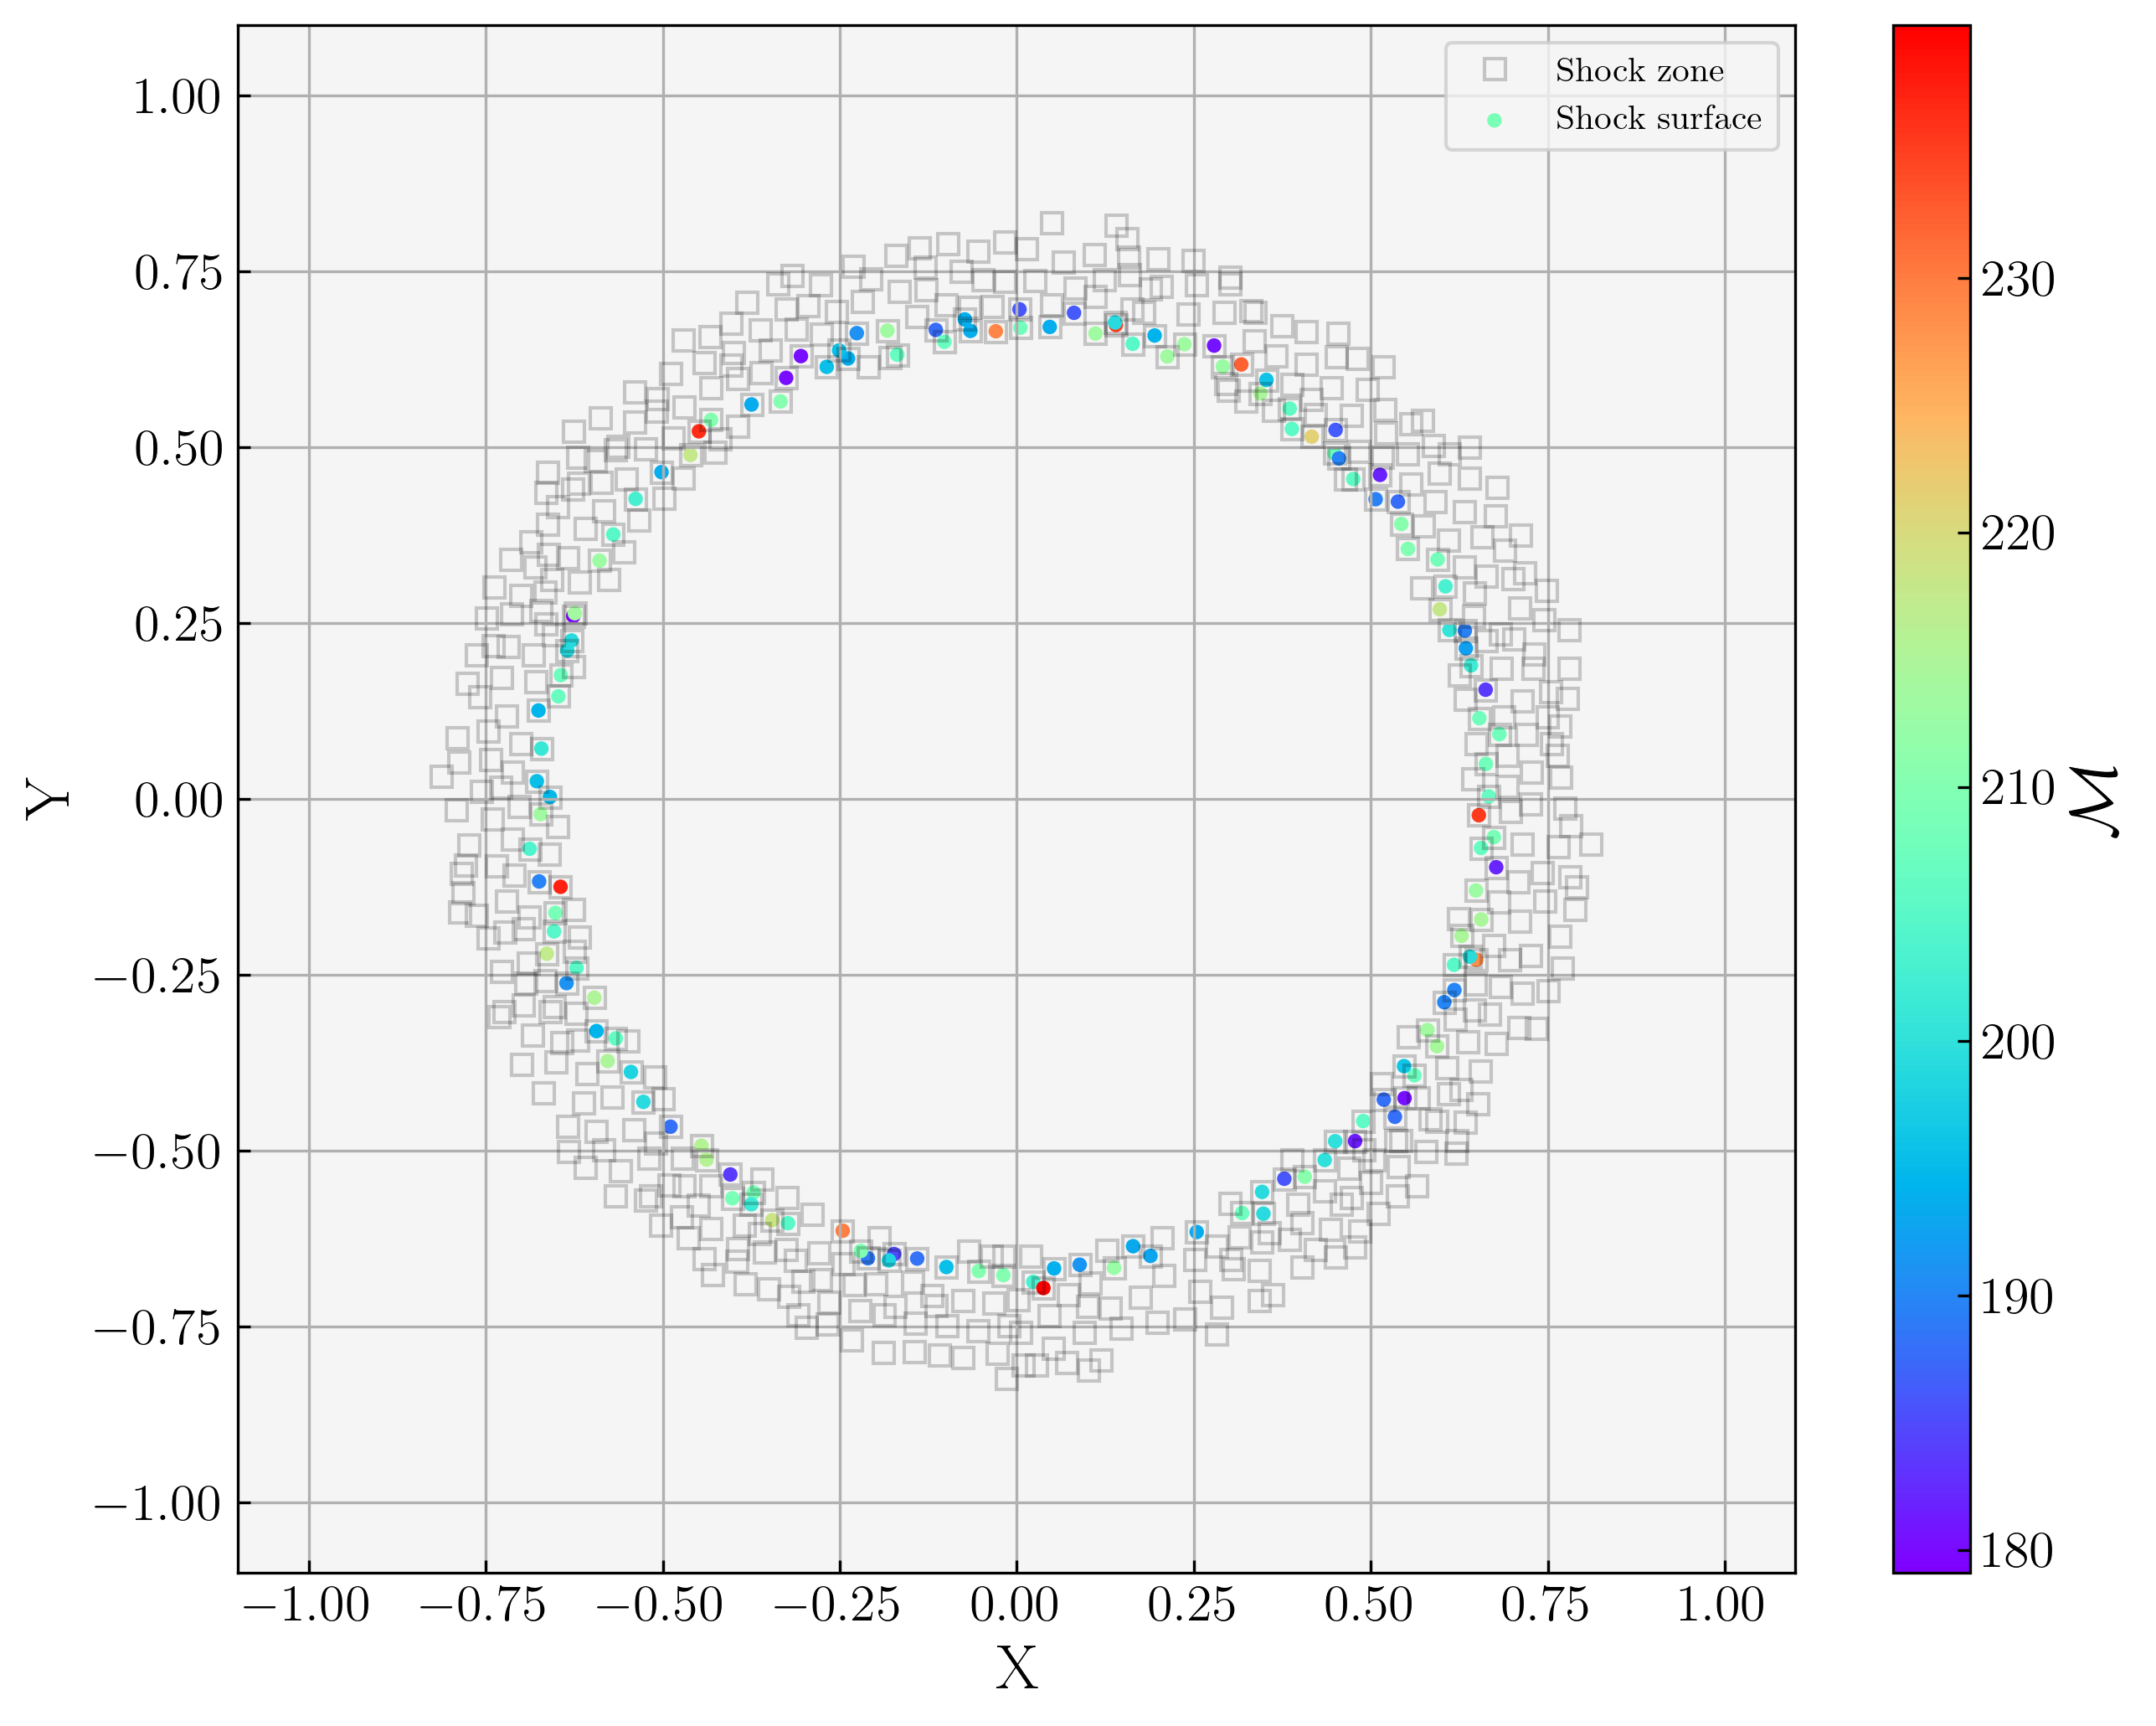

In [52]:
# Maybe for every cell of the shock surface you don't see pre/post because they are not on the same layers
if folder == 'sedov':
    fig, ax = plt.subplots(1,1, figsize = (10,8))
    ax.plot(zone_cross_x, zone_cross_y, 'ks', markerfacecolor='none', ms = 6, markeredgecolor='k', alpha = 0.2, label = 'Shock zone')
    img = ax.scatter(surface_cross_x, surface_cross_y, c = surface_Tmach[np.abs(surface_z-z_chosen)<epsilon_surf], s=10,  cmap = 'rainbow', label = 'Shock surface')#, vmin = 110, vmax = 160)
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    ax.set_xlabel('X', fontsize = 18)
    ax.set_ylabel('Y', fontsize = 18)
    ax.legend()
else: 
    Mbh = 10**m 
    Rt =  Mbh**(1/3) # Msol = 1, Rsol = 1
    apocenter = 2 * Rt * Mbh**(1/3)
    fig, ax = plt.subplots(1,1, figsize = (14,7))
    img = ax.scatter(surface_x/apocenter, surface_y/apocenter, c = surface_Tmach, label = 'Shock surface', cmap = 'rainbow', vmin=1, vmax = 8)
    # plt.ylim(-0.3, 0.2)
    # plt.xlim(-1,0.05)
    plt.xlabel(r'X [$R_\odot$]', fontsize = 18)
    plt.ylabel(r'Y [$R_\odot$]', fontsize = 18)
cbar = plt.colorbar(img)
cbar.set_label(r'$\mathcal{M}$', fontsize = 19)
plt.grid()
if save == True:
    if folder == 'sedov':
        plt.savefig(f'Figs/{snap}/5shocksurfaceMach_thirdV_{snap}.png')
    else:
        plt.savefig(f'Figs/{snap}/5shocksurfaceMach_{snap}.png')
plt.show()